## EE 242 Lab 1b – Modifying Signals - Time Scaling + Time Shift

Author names go here 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [64]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import math
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
from librosa import display
import librosa
import simpleaudio
import soundfile as sf
import IPython

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 1b turn in checklist

•	Lab 1b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF**




## Assignment 3 -- Time Scaling Audio Signals 

This assignment will have four parts, A-D, each of which should be indicated with comments.  

**A.**  Replicate the timescale function in the Lab 1 background document, and save it in its own cell, as indicated in the Lab 1a template. Also read the train.wav file as in Lab 1a.

**B.**  Use the timescale function to obtain w(t)=x1(2t) and v(t)=x1(0.5t)  
    **a.** Create w(t) using a=2 and store the outputs of the timescale function as w and t_w.  
    **b.** Create v(t) using a=0.5 and store the outputs of the timescale function as v and t_v.  
    **c.** Create a time-reversed version of the signal z(t)=x1(-t) by reversing the order of elements in the sequence.  In order to plot in parallel with other signals, use the time vector t_z = t_x1.  
        Note: When trying to play z(t), you might get a C-contiguous error. To fix this, use z(t) = np.ascontiguousarray(z(t)).  
    **d.** Save the resulting signal to a wav file. 

**C.** Load a figure and plot the four signals (x1, w, v, and z) using a 4x1 subplot. Adjust the x and y axis limits to have the same ranges in both plots. Be sure to title the plots and label axes appropriately. For the time axis, you should plot time in msec, for which you will need to multiple the time array by 1000 as in the example in the Background document. Do not use grids on the subplots. Adjust the spacing to avoid overlap. If you have implemented the code correctly, the figure should look something like this. 
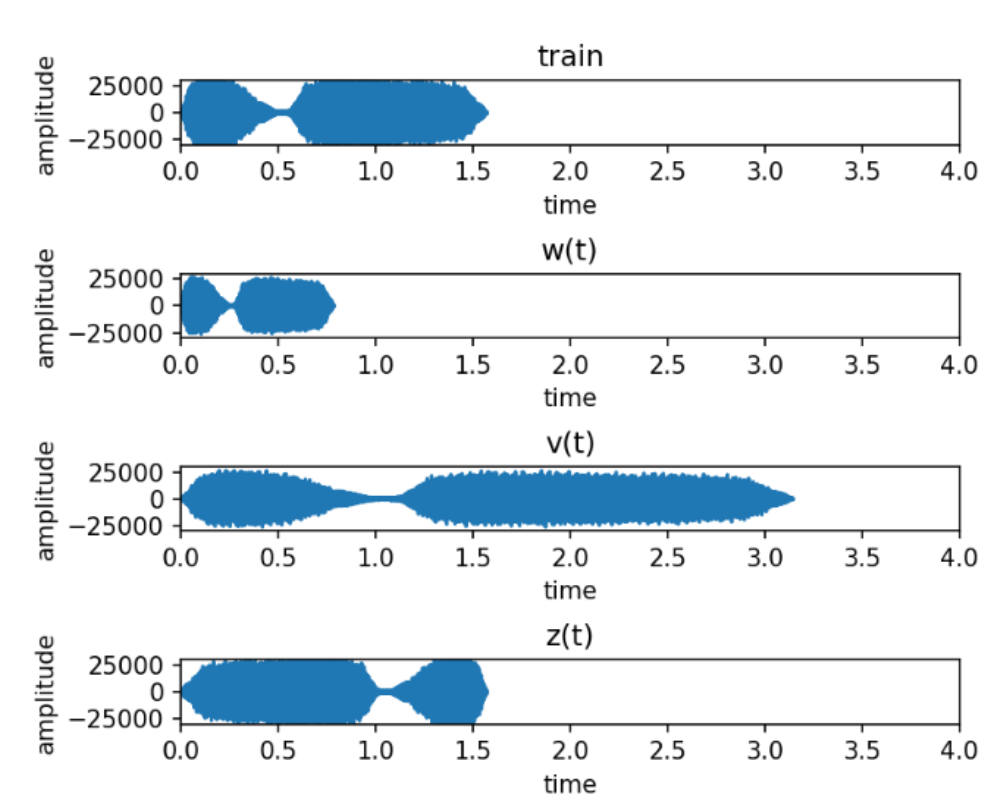

**D.** Read in the signals you created and play them to verify that they sound different based on what you would expect from these transformations. 

In [65]:
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal
def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


<IPython.core.display.Javascript object>


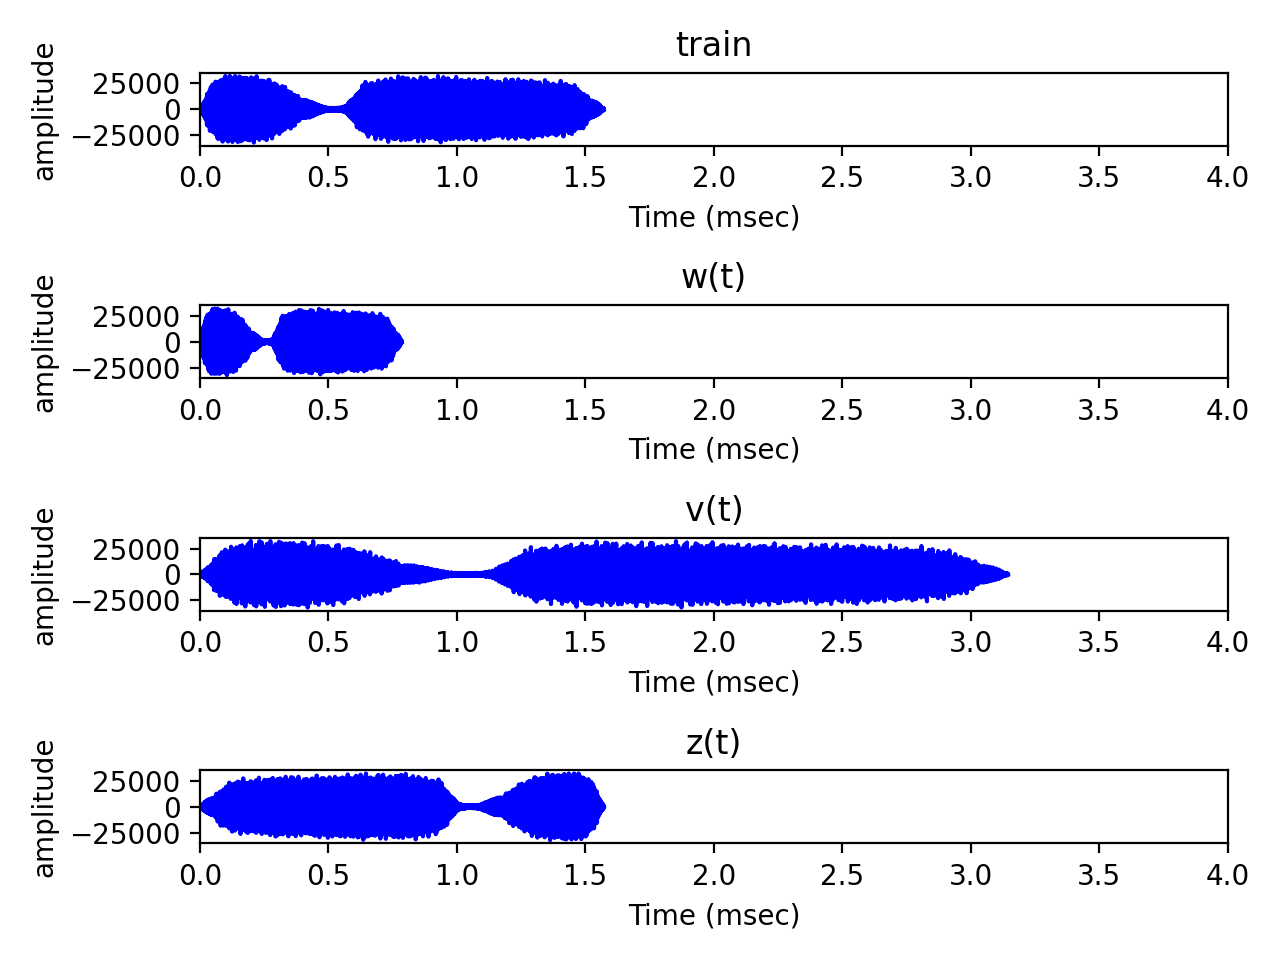

In [45]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
# A. Replicate the timescale function in the Lab 1 background 
# document, and save it in its own cell, as indicated in the Lab 
# 1a template. Also read the train.wav file as in Lab 1a.

# reading in train file.
filename1 = "/Users/ewanlister/Desktop/UW 2022-2023/Fall 2022/242/train32.wav"
x1, fs1 = sf.read(filename1)

# Part B
# TODO: Code that solves B

#B. Use the timescale function to obtain w(t)=x1(2t) and v(t)=x1(0.5t)
#a. Create w(t) using a=2 and store the outputs of the timescale function as w and t_w.
#b. Create v(t) using a=0.5 and store the outputs of the timescale function as v and t_v.
# c. Create a time-reversed version of the signal z(t)=x1(-t) by reversing the order of 
# elements in the sequence. In order to plot in parallel with other signals, use the time vector t_z = t_x1.
# Note: When trying to play z(t), you might get a C-contiguous error. To fix this, use z(t) = np.ascontiguousarray(z(t)).
# d. Save the resulting signal to a wav file.

# Creating x(t), w(t), and v(t) functions through timescale
x1, t_x = timescale(x1, fs1, 1)
w, t_w = timescale(x1, fs1, 2)
v, t_v = timescale(x1, fs1, 0.5)

# As z(t) is a flip/reverse of x(t), using numpy to flip and using above command to fix z(t) play
z = np.flip(x1)

z = np.ascontiguousarray(z)
reverse_name = "reverseTrain.wav"
sf.write(reverse_name, z, fs1)

# testing that signal plays reversed
IPython.display.display(IPython.display.Audio("/Users/ewanlister/Desktop/UW 2022-2023/Fall 2022/242/reverseTrain.wav"))


# Part C
# TODO: Code that solves C
# C. Load a figure and plot the four signals (x1, w, v, and z) 
# using a 4x1 subplot. Adjust the x and y axis limits to have 
# the same ranges in both plots. Be sure to title the plots and 
# label axes appropriately. For the time axis, you should plot 
# time in msec, for which you will need to multiple the time array 
# by 1000 as in the example in the Background document. Do not use 
# grids on the subplots. Adjust the spacing to avoid overlap. If you 
# have implemented the code correctly, the figure should look something like this.

# Defining fig and axis for subplots: train, w(t), v(t), z(t)
fig, ax = plt.subplots(4, 1)
fig.set_tight_layout(True)

plt.subplot(4, 1, 1)
plt.plot(t_x, x1 * fs1, '-b')
plt.title("train")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

plt.subplot(4, 1, 2)
plt.plot(t_w, w * fs1, '-b')
plt.title("w(t)")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

plt.subplot(4, 1, 3)
plt.plot(t_v, v * fs1, '-b')
plt.title("v(t)")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

plt.subplot(4, 1, 4)
plt.plot(t_x, z * fs1, '-b')
plt.title("z(t)")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

# Part D
# TODO: Code that solves D

# Writing z(t) as reverseTrain.wav and then displaying the audio to play it
sf.write("wtrain.wav", w, fs1)
sf.write("vtrain.wav", v, fs1)
sf.write("ztrain.wav", z, fs1)

filedir = "/Users/ewanlister/Desktop/UW 2022-2023/Fall 2022/242/"

# Writing w(t), v(t), and z(t) and then displaying the audio to play
IPython.display.display(IPython.display.Audio(filedir + "train32.wav"))
IPython.display.display(IPython.display.Audio(filedir + "wtrain.wav"))
IPython.display.display(IPython.display.Audio(filedir + "vtrain.wav"))
IPython.display.display(IPython.display.Audio(filedir + "ztrain.wav"))



###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

## Assignment 4 -- Time Shift Operations

We will now implement and test a timeshift function. This assignment will have four parts, A-D, each of which should be indicated with comments, following the guidelines in the Lab 1 template.  

**A.**  Write a function called timeshift that takes as input: a signal x, the sampling frequency fs (in Hz), and a time shift t0 (in seconds). The function should implement y(t) = x(t+t0) and produce as output the portion of the shifted signal starting at time 0. Assume that the original signal has value zero outside the time window. Your function should: 

**1.** Find the integer shift n0 given t0 and fs.  
**2.** Use conditional control that tests whether the time shift is positive or negative  
**2.1.** For a time delay, create y by concatenating a zero vector with the original signal. (The output should be longer than the original signal.)  
**2.2.** For a time advance, create y by copying the portion of the starting from n0 and then appending n0 zeroes at the end of the signal. (The output should be the same length as the original signal.)  
**3.** Based on the length of the final signal and the sampling frequency, create a time vector that corresponds to the output signal length, starting at 0. 
**4.** Return the new signal and the time vector. Save the function it in its own cell, as indicated in the Lab 1 template. 

**B.** Use the function to create x1(t+0.5) and x1(t-2). Plot the shifted signals with the original in a 3x1 plot: x1(t), x1(t+0.5), and x1(t-2). The x-axis should be between 0 and 4 for all three plots. Label axes and title the plot.

**C.** Play all three signals. For the signal that has been advanced, you should be able to hear that part of the sound is missing, since we have not preserved those samples. 

In [98]:
# A. Write a function called timeshift that takes as input: 
# a signal x, the sampling frequency fs (in Hz), and a time 
# shift t0 (in seconds). The function should implement y(t) = 
# x(t+t0) and produce as output the portion of the shifted signal 
# starting at time 0. Assume that the original signal has value zero 
# outside the time window. Your function should:

    # 2. Use conditional control that tests whether the time shift is positive or negative
    # 2.1. For a time delay, create y by concatenating a zero vector with the original 
    # signal. (The output should be longer than the original signal.)
    # 2.2. For a time advance, create y by copying the portion of the starting from n0 
    # and then appending n0 zeroes at the end of the signal. (The output should be the 
    # same length as the original signal.)
    # 3. Based on the length of the final signal and the sampling frequency, create a 
    # time vector that corresponds to the output signal length, starting at 0. 4. Return 
    # the new signal and the time vector. Save the function it in its own cell, as indicated in the Lab 1 template.



def timeshift(x, fs, t):
    n = int(fs * abs(t))
    
    pedding = np.zeros(n)
    
    if (t >= 0):
        y = np.concatenate([x[n:], pedding])
    else:
        y=np.concatenate((pedding, x))
        
    t = np.arange(0,len(y),1)*(1.0/fs)

    return y, t



<IPython.core.display.Javascript object>


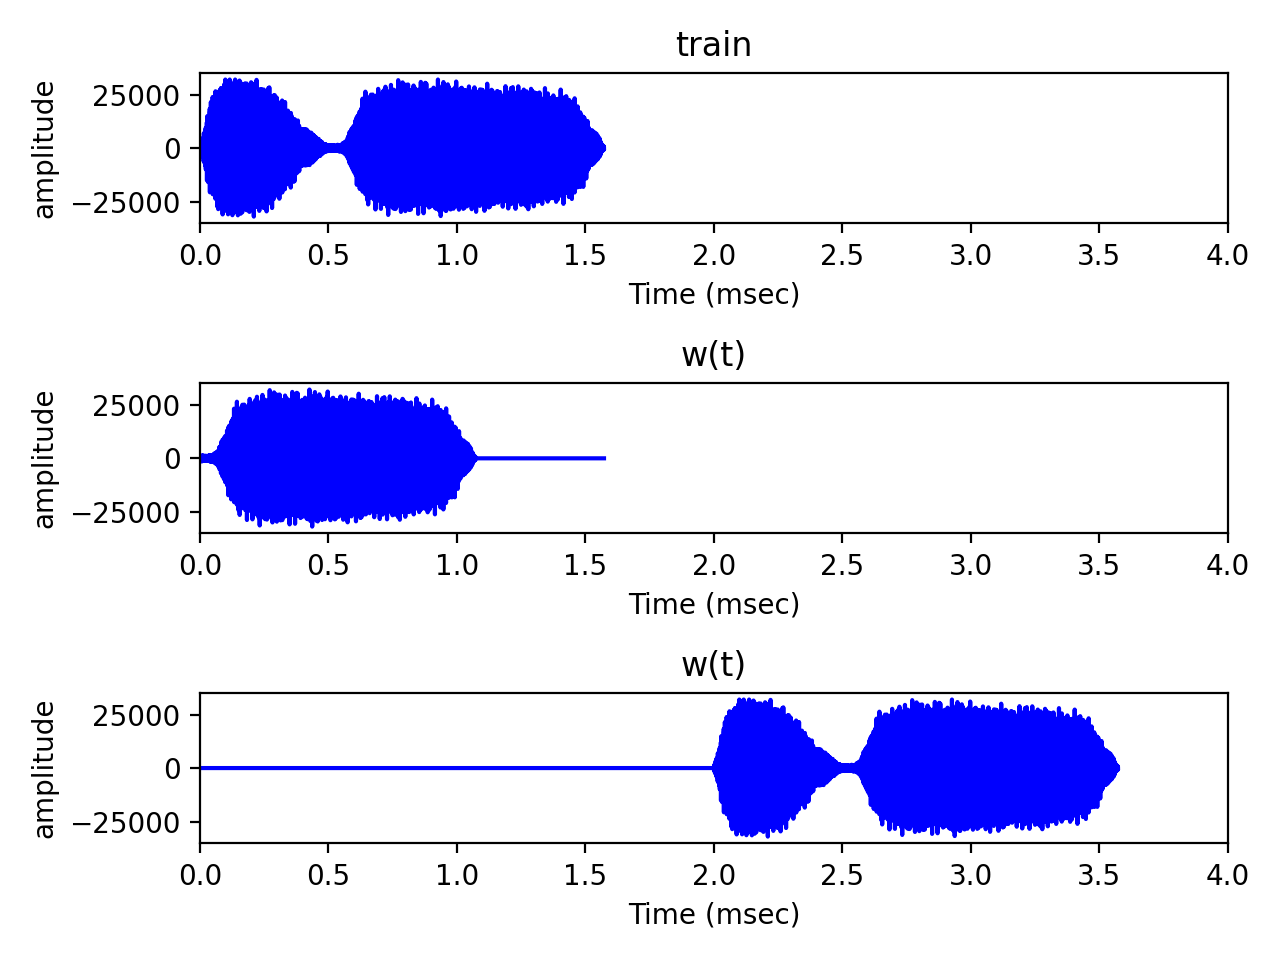

In [100]:
# Part A
# TODO: Code that solves A

# Part B
# TODO: Code that solves B


x11, t11 = timeshift(x1, fs1, 0.5)
x12, t12 = timeshift(x1, fs1, -2)

fig, ax = plt.subplots(3, 1)
fig.set_tight_layout(True)

plt.subplot(3, 1, 1)
plt.plot(t_x, x1 * fs1, '-b')
plt.title("train")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

plt.subplot(3, 1, 2)
plt.plot(t11, x11 * fs1, '-b')
plt.title("w(t)")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

plt.subplot(3, 1, 3)
plt.plot(t12, x12 * fs1, '-b')
plt.title("w(t)")
plt.xlabel('Time (msec)')
plt.ylabel('amplitude')
plt.xlim(0 , 4)

# Part C
# TODO: Code that solves C
#sf.write("xtrain.wav", w, fs1)
sf.write("x11train.wav", x11, fs1)
sf.write("x12train.wav", x12, fs1)

#IPython.display.display(IPython.display.Audio(filedir + "wtrain.wav"))
IPython.display.display(IPython.display.Audio(filedir + "x11train.wav"))
IPython.display.display(IPython.display.Audio(filedir + "x12train.wav"))


### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

Our current implementation does not correctly handle this case. In the future we need to include a condition which checks if t0 is larger than the timespan of the original signal.
